In [70]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [71]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)
# data = pd.read_sql_query('SELECT * FROM loan', engine)
# data.head()

In [115]:
query = '''select t.type, t.operation, t.amount as t_amount, t.balance, t.k_symbol, l.amount as l_amount, l.duration, l.payments, l.status
from trans t
left join loan l
on t.account_id = l.account_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,700.0,700.0,,NaN,NaN,NaN,None
1,PRIJEM,VKLAD,900.0,900.0,,NaN,NaN,NaN,None
2,PRIJEM,VKLAD,1000.0,1000.0,,NaN,NaN,NaN,None
3,PRIJEM,VKLAD,600.0,600.0,,NaN,NaN,NaN,None
4,PRIJEM,VKLAD,400.0,400.0,,NaN,NaN,NaN,None


In [116]:
data['status'].value_counts()

C    72288
A    64599
B     9765
D     9429
Name: status, dtype: int64

In [117]:
data.shape

(868019, 9)

In [118]:
data.dtypes

type          object
operation     object
t_amount     float64
balance      float64
k_symbol      object
l_amount     float64
duration     float64
payments     float64
status        object
dtype: object

In [119]:
data.isna().sum()

type              0
operation         0
t_amount          0
balance           0
k_symbol          0
l_amount     711938
duration     711938
payments     711938
status       711938
dtype: int64

In [77]:
data = data[data['duration'].isna() == False]

In [78]:
data.isna().sum()

type         0
operation    0
t_amount     0
balance      0
k_symbol     0
l_amount     0
duration     0
payments     0
status       0
dtype: int64

In [79]:
data['duration'] = data['duration'].astype('object') # This will be treated as categorical
data.describe()

,t_amount,balance,l_amount,payments
count,156081.000000,156081.000000,156081.000000,156081.000000
mean,7795.357503,45353.630156,146822.230995,4189.309205
std,11707.393031,25028.806295,109974.568837,2198.565442
min,0.000000,-19310.000000,4980.000000,304.000000
25%,144.100000,27291.700000,65184.000000,2482.000000
50%,2800.000000,40649.500000,111384.000000,3900.000000
75%,9902.000000,59162.000000,203940.000000,5900.000000
max,87300.000000,209637.000000,590820.000000,9910.000000


In [80]:
data['duration'].value_counts()

24    34141
12    32217
60    32042
48    29265
36    28416
Name: duration, dtype: int64

In [81]:
data.isna().sum()

type         0
operation    0
t_amount     0
balance      0
k_symbol     0
l_amount     0
duration     0
payments     0
status       0
dtype: int64

In [82]:
data['operation'].value_counts()
def cleanOperation(x):
    x = x.lower()
    if 'vyber' in x:
        return "vyber"
    elif 'prevod' in x:
        return "prevod"
    elif 'vklad' in x:
        return 'vklad'
    else:
        return 'unknown'

In [83]:
data['operation'] = list(map(cleanOperation, data['operation']))

In [84]:
data['k_symbol'].value_counts()
data['k_symbol'].value_counts().index
def cleankSymbol(x):
    if x in ['', ' ']:
        return 'unknown'
    else:
        return x

data['k_symbol'] = list(map(cleankSymbol, data['k_symbol']))
data = data[~data['k_symbol'].isin(['POJISTINE', 'SANKC. UROK', 'UVER'])]

In [85]:
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,vklad,1100.0,1100.0,unknown,96396,12,8033.0,B
1,PRIJEM,vklad,9900.0,11000.0,unknown,96396,12,8033.0,B
2,PRIJEM,vklad,700.0,700.0,unknown,165960,36,4610.0,A
3,PRIJEM,unknown,2.9,702.9,UROK,165960,36,4610.0,A
4,PRIJEM,vklad,18972.0,19674.9,unknown,165960,36,4610.0,A


In [86]:
data['type'].value_counts()

VYDAJ     83095
PRIJEM    59306
VYBER      5347
Name: type, dtype: int64

In [87]:
'PRI' in '123PRIJEM'

True

In [88]:
def clean_type(x):
    if 'PRI' in x:
        return 'PRIJEM'
    else:
        return x

In [89]:
data['type'] = list(map(clean_type, data['type']))

In [90]:
data['duration'].value_counts()

24    32595
12    31278
60    29797
48    27330
36    26748
Name: duration, dtype: int64

In [91]:
data.shape

(147748, 9)

In [92]:
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,vklad,1100.0,1100.0,unknown,96396,12,8033.0,B
1,PRIJEM,vklad,9900.0,11000.0,unknown,96396,12,8033.0,B
2,PRIJEM,vklad,700.0,700.0,unknown,165960,36,4610.0,A
3,PRIJEM,unknown,2.9,702.9,UROK,165960,36,4610.0,A
4,PRIJEM,vklad,18972.0,19674.9,unknown,165960,36,4610.0,A


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

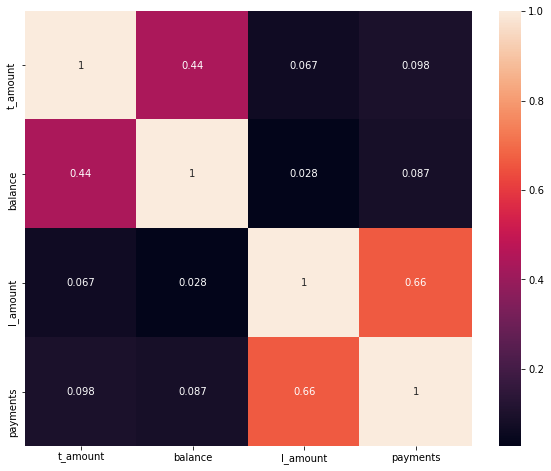

In [94]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


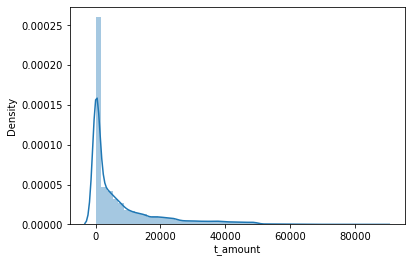

In [95]:
sns.distplot(data['t_amount'])
plt.show()


C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


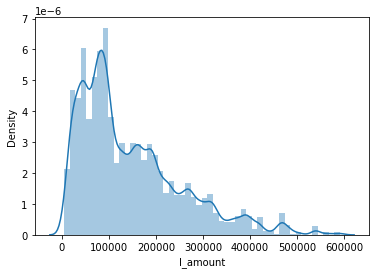

In [96]:

sns.distplot(data['l_amount'])
plt.show()



C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


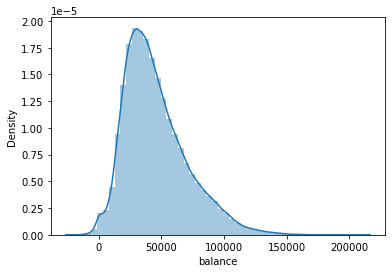

In [97]:
sns.distplot(data['balance'])
plt.show()


C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


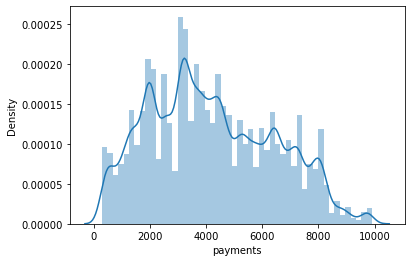

In [98]:

sns.distplot(data['payments'])
plt.show()

In [99]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X = data.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [100]:
cat = data.select_dtypes(include = np.object)
cat = cat.drop(['status'], axis=1)
categorical = pd.get_dummies(cat, columns=['type', 'operation', 'k_symbol', 'duration'])

In [101]:
y = data['status']
X = np.concatenate((x, categorical), axis=1)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [103]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

C:\Users\Lorenzo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
classification.score(X_test, y_test)

0.7062267343485618

In [105]:
predictions = classification.predict(X_test)
predictions

array(['A', 'A', 'C', ..., 'A', 'A', 'A'], dtype=object)

In [106]:
pd.Series(predictions).value_counts()

C    30522
A    28232
B      341
D        5
dtype: int64

In [107]:
y_test.value_counts()

C    27170
A    24765
B     3703
D     3462
Name: status, dtype: int64

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)


array([[19620,    80,  5064,     1],
       [ 2737,   181,   783,     2],
       [ 5205,    30, 21935,     0],
       [  670,    50,  2740,     2]], dtype=int64)

In [109]:
# from sklearn import metrics
# import matplotlib.pyplot as plt

# y_pred_proba = classification.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr)

In [110]:
classification.predict_proba(X_test)

array([[0.69630742, 0.05255113, 0.23711146, 0.01402998],
       [0.31241649, 0.23479086, 0.30404844, 0.1487442 ],
       [0.03840222, 0.01197533, 0.83501222, 0.11461024],
       ...,
       [0.70824116, 0.17599407, 0.09596763, 0.01979714],
       [0.44237475, 0.07454338, 0.43899527, 0.0440866 ],
       [0.66920686, 0.07174143, 0.24072349, 0.01832822]])

In [111]:
classification.predict_proba(X_test)[::,0]

array([0.69630742, 0.31241649, 0.03840222, ..., 0.70824116, 0.44237475,
       0.66920686])

In [112]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0,1,2,3])
n_classes = 4

In [113]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

In [114]:
# y